<a href="https://colab.research.google.com/github/dariakrtn/AI_2022/blob/main/lab_4_optuna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. *Импорт библиотек и вспомогательные функции/классы*

In [2]:
# !pip install optuna

In [3]:
import optuna
import sklearn.ensemble
import sklearn.svm
import logging

In [4]:
import logging
import sys

import sklearn.datasets
import sklearn.linear_model
import sklearn.model_selection
import optuna

In [5]:
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice

# 1. *Применение оптуны на функцию Матьяса*

In [6]:
def f_mat (x, y):
  return 0.26*(x*x +y*y)-0.48*x*y

def objective(trial):
  x = trial.suggest_float('x', -10, 10)
  y = trial.suggest_float('y', -10, 10)
  return f_mat (x, y)

In [7]:
optuna.logging.disable_default_handler() 
optuna.logging.disable_propagation()
study =optuna.create_study()
study.optimize(objective, n_trials=100)


In [8]:
best_params = study.best_params
found_x = best_params['x']
found_y = best_params['y']
print(f"Found x: {found_x},  Found y: {found_y}, f_mat(x,y): {f_mat(found_x, found_y)}")

Found x: 0.2812734833141193,  Found y: 0.19611118336715183, f_mat(x,y): 0.004092115532888199


# 2. *Использование datasets Iris и оптимизация параметров с помощью optuna*

In [9]:
def objective(trial):
    iris = sklearn.datasets.load_iris()  # грузим датасет
    classes = list(set(iris.target))
    train_x, valid_x, train_y, valid_y = sklearn.model_selection.train_test_split( # разюитие на тест и тренировку в данном случае 75 на 25
        iris.data, iris.target, test_size=0.25, random_state=0
    )


    max_iter = trial.suggest_int("max_iter", 50, 400)
    verbose = trial.suggest_int("verbose", 0, 100)
    clf = sklearn.linear_model.SGDClassifier(max_iter=max_iter, verbose = verbose)

    for step in range(100):
        clf.fit(train_x, train_y)

        # Report intermediate objective value.
        intermediate_value = 1.0 - clf.score(valid_x, valid_y)
        trial.report(intermediate_value, step)

        # Handle pruning based on the intermediate value.
        if trial.should_prune():
            raise optuna.TrialPruned()

    return 1.0 - clf.score(valid_x, valid_y)


In [25]:
optuna.logging.disable_default_handler() 
optuna.logging.disable_propagation()
optuna.logging.get_logger("optuna").addHandler(logging.StreamHandler(sys.stdout))
study = optuna.create_study(pruner=optuna.pruners.MedianPruner())
study.optimize(objective, n_trials=20)

In [19]:
plot_optimization_history(study)

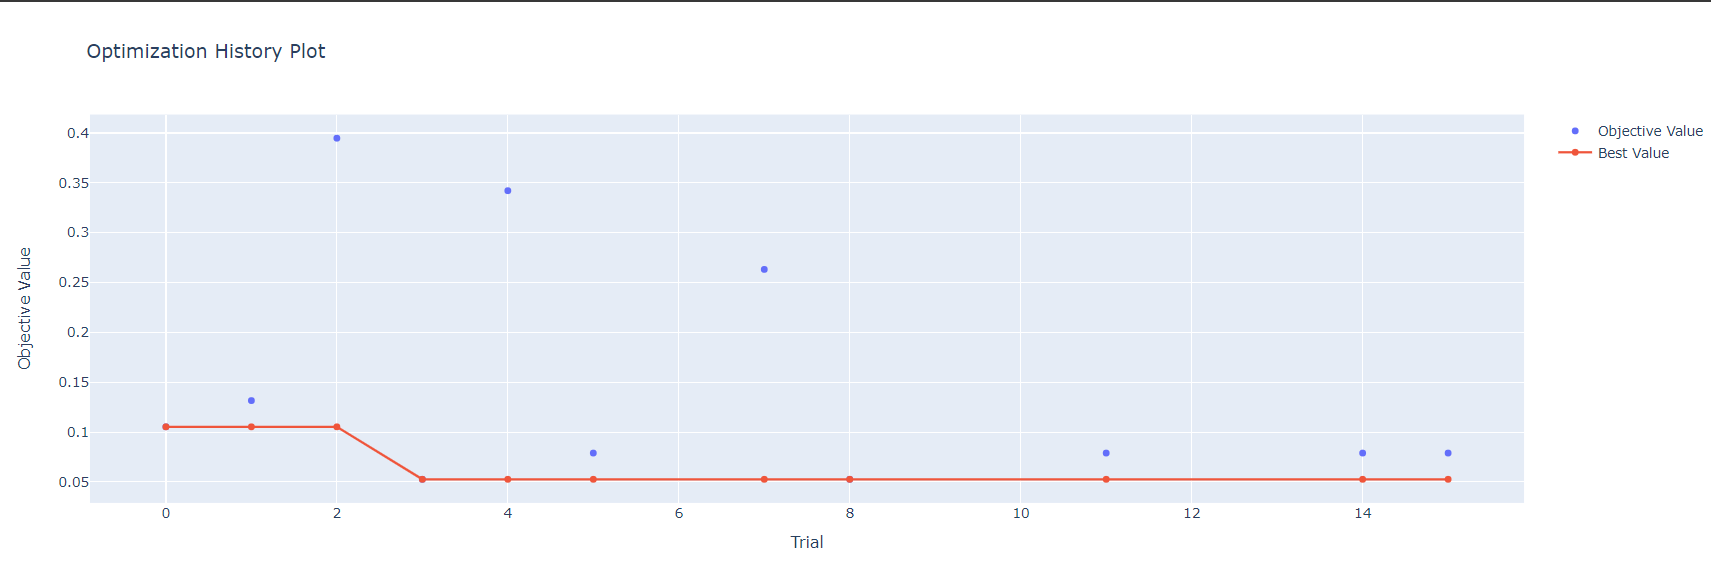

In [20]:
plot_contour(study)

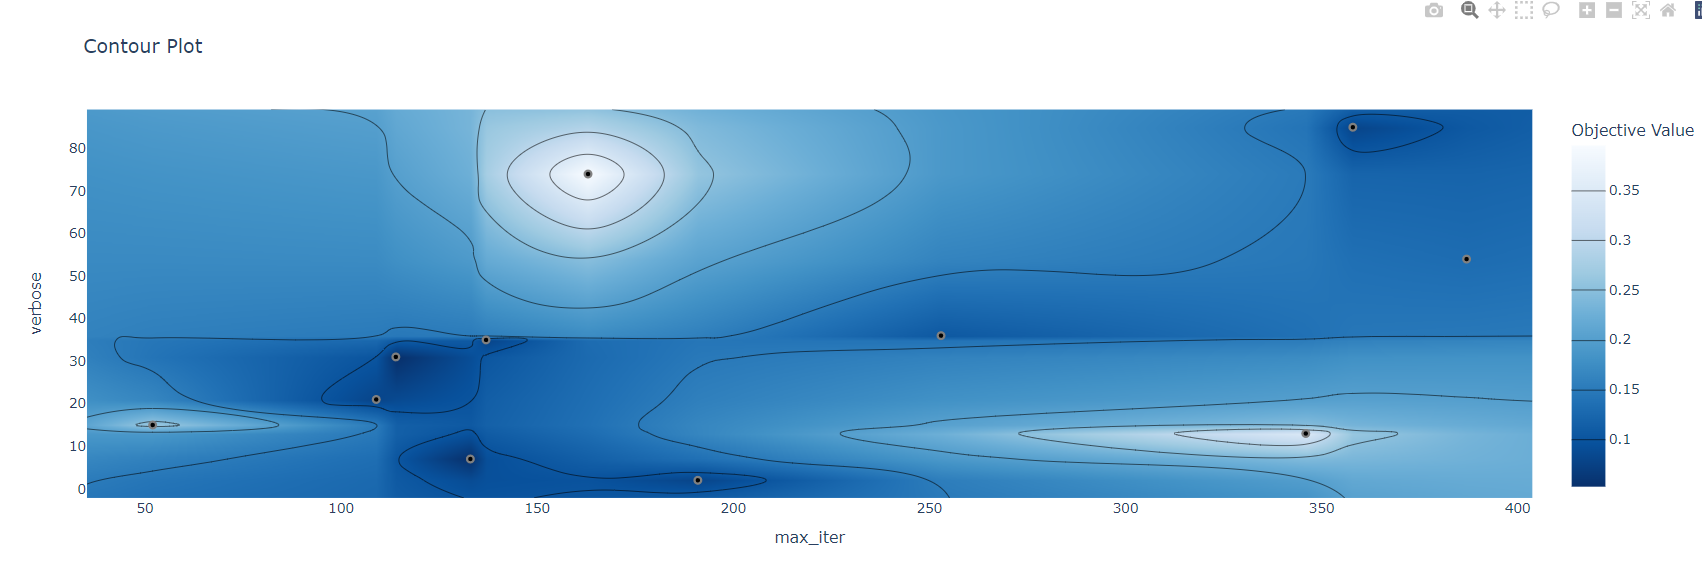

In [21]:
plot_parallel_coordinate(study)

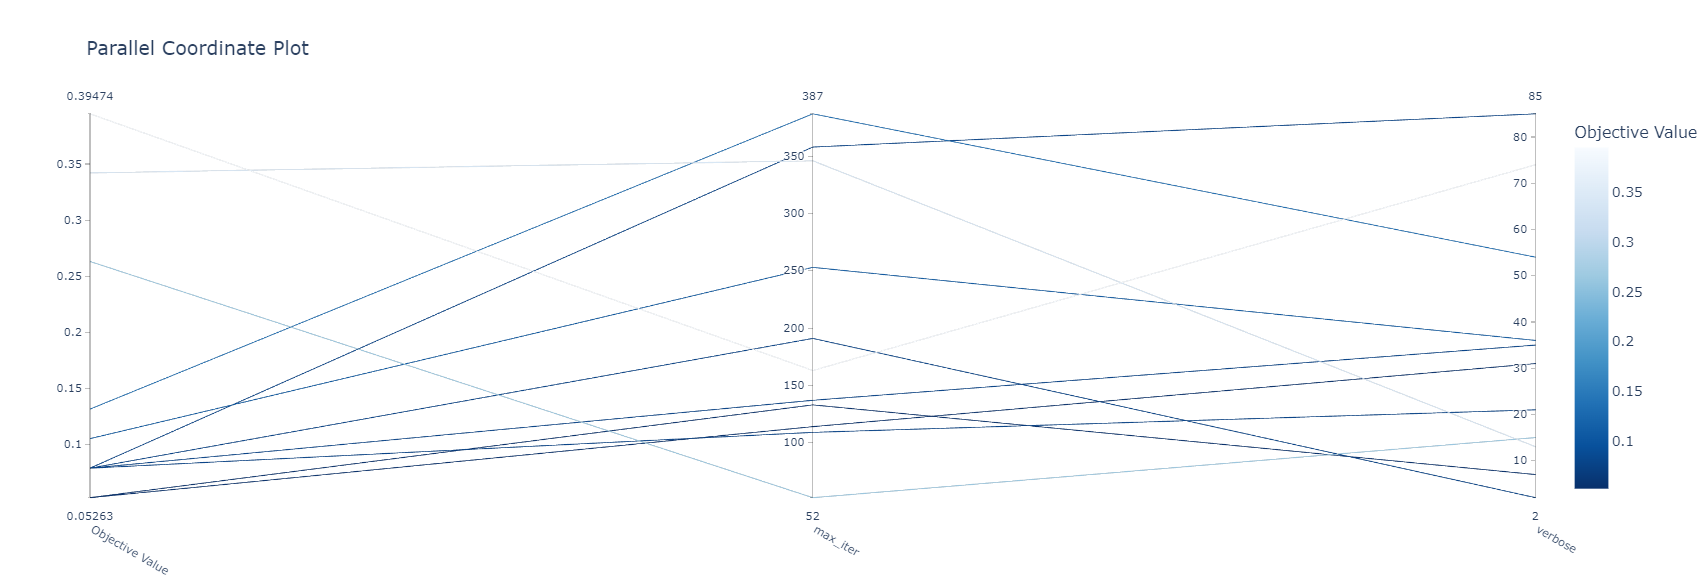

In [22]:
plot_slice(study)

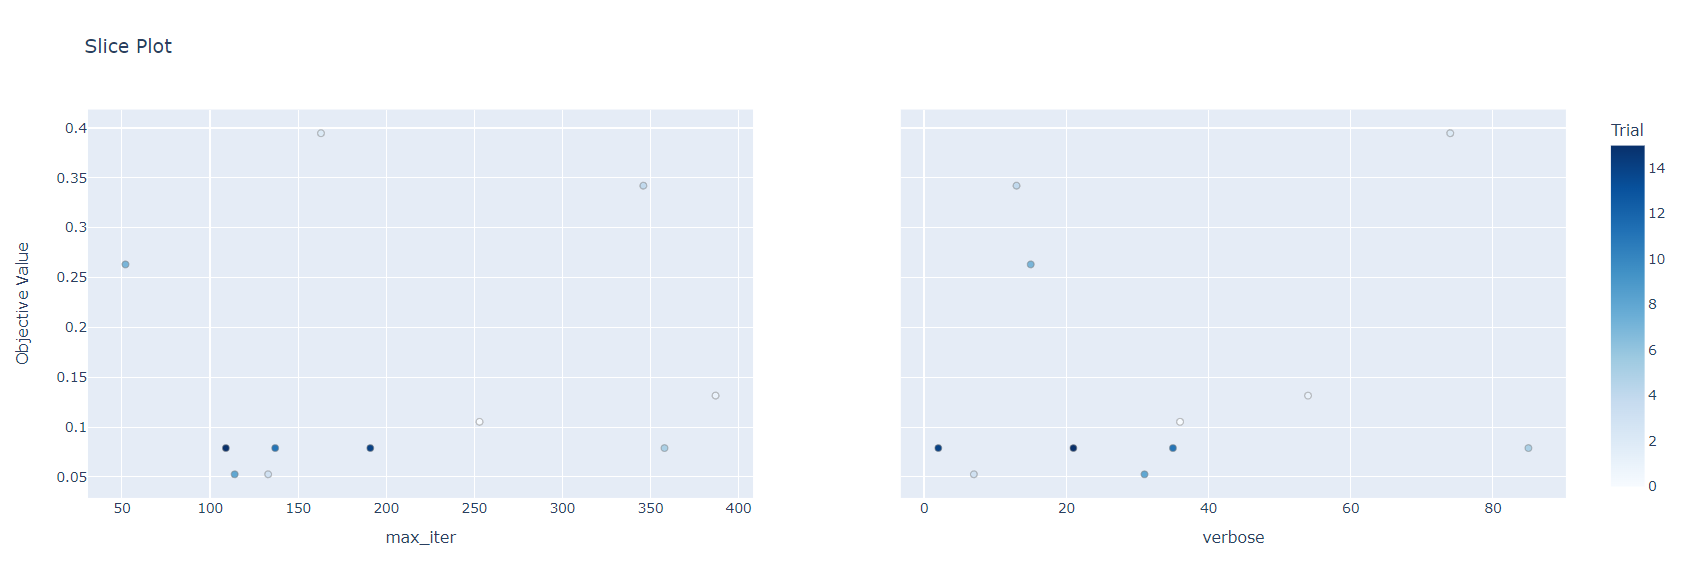

In [23]:
plot_param_importances(study)

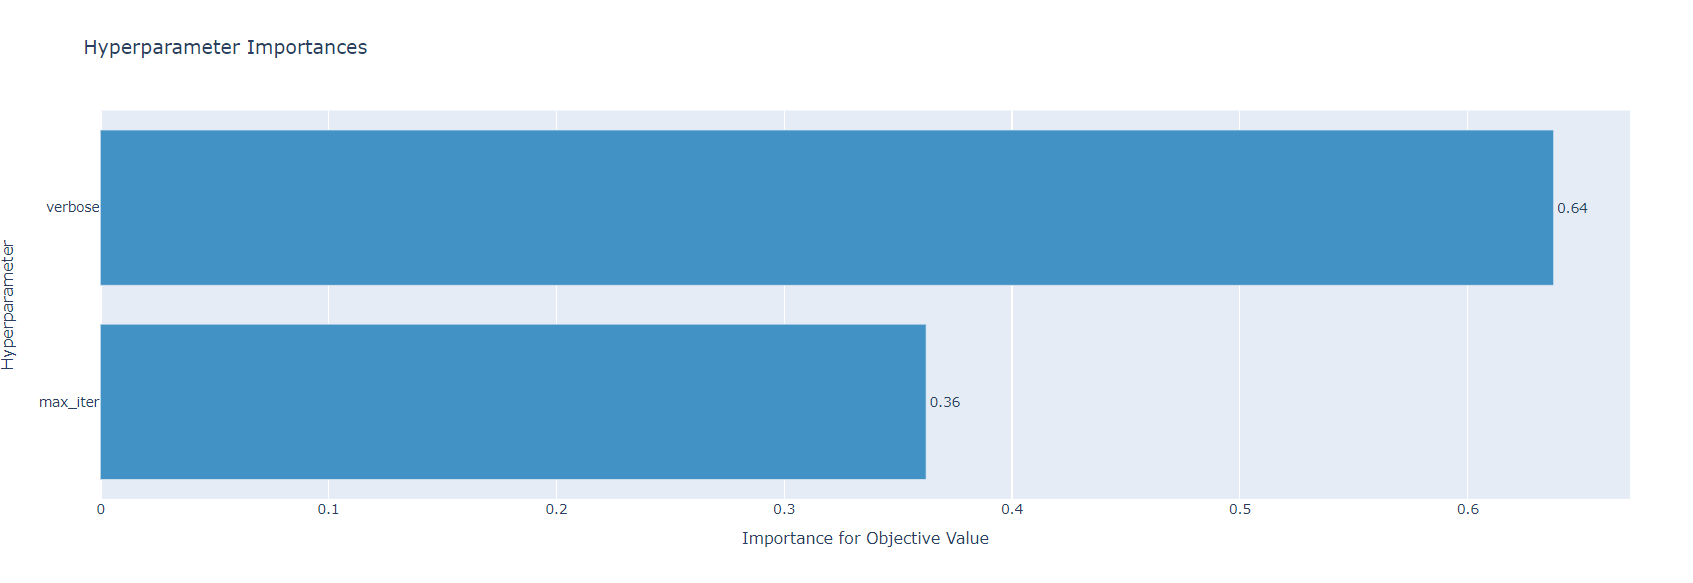

In [24]:
plot_edf(study)

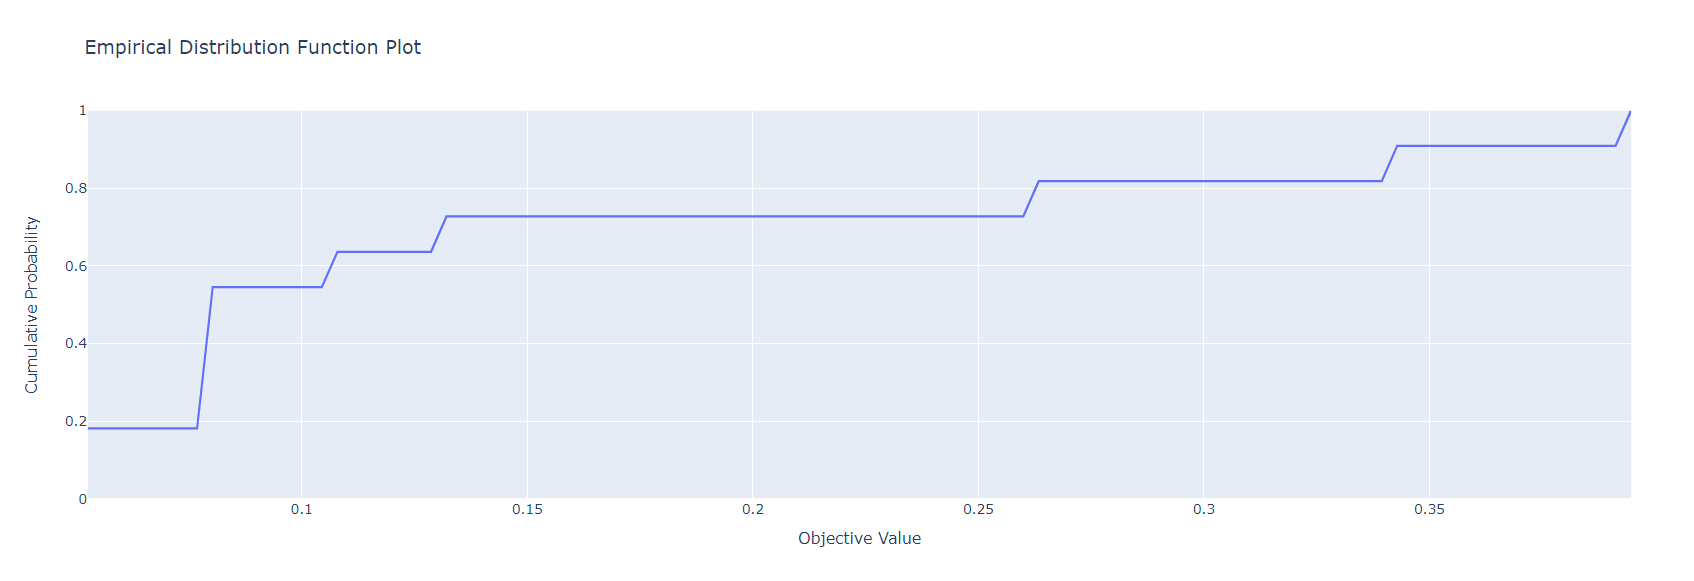